In [1]:
%load_ext autoreload
%autoreload 2

Source: https://www.arcgis.com/apps/instant/media/index.html?appid=fc92d38533d440078f17678ebc20e8e2

In [2]:
import geopandas as gpd
import pandas as pd
from s1_lulc import get_s1_lulc_data
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from dem_stitcher.rio_tools import update_profile_resolution, reproject_arr_to_match_profile
from dem_stitcher.rio_window import get_indices_from_extent
from rasterio.transform import xy
from rasterio.warp import transform
from shapely.geometry import box
from rasterio.plot import show

# Read Database

In [3]:
df_chips = gpd.read_file('s3://opera-calval-database-dswx/site.geojson')
df_chips.dropna(inplace=True)
df_chips.head()

,site_name,water_content,geometry
0,3_38,3.0,"POLYGON ((-159.78489 69.25969, -159.65899 69.2..."
1,4_27,4.0,"POLYGON ((-113.10838 67.09964, -113.09840 67.0..."
2,4_43,4.0,"POLYGON ((17.61007 66.01963, 17.81779 66.01970..."
3,3_1,3.0,"POLYGON ((59.55613 65.74045, 59.55651 65.83973..."
4,4_34,4.0,"POLYGON ((-96.71059 62.77966, -96.57702 62.779..."


In [4]:
df_chips.to_file('original_chips.geojson', driver='GeoJSON')

In [5]:
df_chips.shape

(131, 3)

In [6]:
df_chips.bounds.head()

,minx,miny,maxx,maxy
0,-159.785408,69.160356,-159.510842,69.259693
1,-113.108802,67.000433,-112.858698,67.099714
2,17.578822,65.920365,17.818178,66.019703
3,59.556134,65.740453,59.793866,65.839734
4,-96.710885,62.680383,-96.497865,62.779659


In [7]:
df_chips.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Get LULC Chips

In [8]:
bounds_per_chip = [geo.bounds for geo in df_chips.geometry]

In [9]:
lulc_arrays, lulc_profiles = zip(*list(map(get_s1_lulc_data, tqdm(bounds_per_chip))))

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.25s/it]

localizing rasters: 100%|███████████████████| 2/2 [00:04<00:00,  2.13s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:01<00:00,  1.65s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.39s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:03<00:00,  3.18s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.56s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.52s/it]

localizing rasters: 100%|███████████████████| 2/2 [00:03<00:00,  1.87s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.21s/it]

localizing rasters: 100%|███████████████████| 2/2 [00:04<00:00,  2.31s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.84s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.23s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:01<00:00,  1.52s/it]

localizing r

localizing rasters: 100%|███████████████████| 1/1 [00:01<00:00,  1.96s/it]

localizing rasters: 100%|███████████████████| 2/2 [00:03<00:00,  1.72s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.36s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:03<00:00,  3.37s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:01<00:00,  1.77s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:03<00:00,  3.43s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:01<00:00,  1.67s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:01<00:00,  1.58s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.83s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:03<00:00,  3.72s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:01<00:00,  1.81s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:03<00:00,  3.51s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:01<00:00,  1.79s/it]

localizing r

localizing rasters: 100%|███████████████████| 2/2 [00:05<00:00,  2.65s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.02s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:01<00:00,  1.63s/it]

localizing rasters: 100%|███████████████████| 2/2 [00:04<00:00,  2.45s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.47s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.25s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:01<00:00,  1.74s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.24s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:01<00:00,  1.94s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:01<00:00,  1.95s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.54s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:01<00:00,  1.69s/it]

localizing rasters: 100%|███████████████████| 2/2 [00:01<00:00,  1.46it/s]

localizing r

localizing rasters: 100%|███████████████████| 2/2 [00:02<00:00,  1.49s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.03s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:03<00:00,  3.14s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.65s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.97s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:01<00:00,  1.87s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:01<00:00,  1.65s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.19s/it]

localizing rasters: 100%|███████████████████| 2/2 [00:02<00:00,  1.38s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.04s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.43s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:01<00:00,  1.71s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.14s/it]

localizing r

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.63s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.90s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:01<00:00,  1.97s/it]

localizing rasters: 100%|███████████████████| 2/2 [00:03<00:00,  1.98s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:00<00:00,  1.13it/s]

localizing rasters: 100%|███████████████████| 1/1 [00:00<00:00,  1.15it/s]

localizing rasters: 100%|███████████████████| 2/2 [00:02<00:00,  1.36s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.38s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.41s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.60s/it]

localizing rasters: 100%|███████████████████| 2/2 [00:03<00:00,  1.63s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:03<00:00,  3.46s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:01<00:00,  1.72s/it]

localizing r

localizing rasters: 100%|███████████████████| 1/1 [00:00<00:00,  1.08it/s]

localizing rasters: 100%|███████████████████| 1/1 [00:00<00:00,  1.00it/s]

localizing rasters: 100%|███████████████████| 1/1 [00:01<00:00,  1.85s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:01<00:00,  1.94s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:01<00:00,  1.90s/it]

localizing rasters: 100%|███████████████████| 1/1 [00:02<00:00,  2.09s/it]

100%|███████████████████████████████████| 131/131 [05:22<00:00,  2.46s/it]


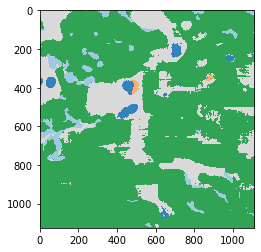

In [10]:
plt.imshow(lulc_arrays[23], cmap='tab20c', interpolation='None')

# Extract Water and Inundated Vegetation

100%|██████████████████████████████████| 131/131 [00:00<00:00, 893.84it/s]


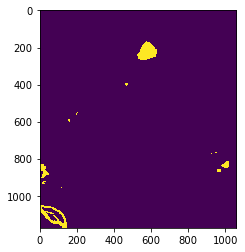

In [11]:
def to_binary_arr(arr, label):
    arr_out = np.zeros(arr.shape)
    arr_out[arr == label] = 1
    return arr_out

water_extr = lambda arr: to_binary_arr(arr, 1)

water_arrays = [water_extr(arr) for arr in tqdm(lulc_arrays)]
plt.imshow(water_arrays[3], interpolation='none')

100%|█████████████████████████████████| 131/131 [00:00<00:00, 1550.37it/s]


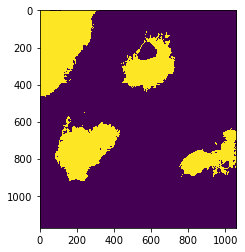

In [12]:
wetland_extr = lambda arr: to_binary_arr(arr, 4)

wetland_arrays = [wetland_extr(arr) for arr in tqdm(lulc_arrays)]
plt.imshow(wetland_arrays[3], interpolation='none')

 99%|██████████████████████████████████▋| 130/131 [00:01<00:00, 86.99it/s]


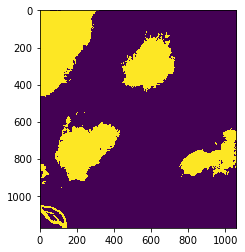

In [13]:
total_water_arrays = [x + y for (x, y) in zip(water_arrays, tqdm(wetland_arrays))]
plt.imshow(total_water_arrays[3], interpolation='none')

# Transform and Explore

## Resample

In [14]:
p = lulc_profiles[3]
X = water_arrays[3]
p

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 1061, 'height': 1173, 'count': 1, 'crs': CRS.from_epsg(32640), 'transform': Affine(10.0, 0.0, 617058.0054133973,
       0.0, -10.0, 7304987.97658339), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}

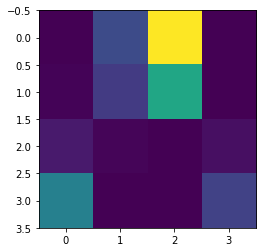

In [15]:
p_new = update_profile_resolution(p, 2_500)
p['dtype'] = 'float32'
X_r, _ = reproject_arr_to_match_profile(X, p, p_new)
X_r = X_r[0, ...]

plt.imshow(X_r)

In [16]:
row, col = np.unravel_index(X_r.argmax(), X_r.shape)
row, col

(0, 2)

In [17]:
x_utm, y_utm = xy(p['transform'], row, col, offset='ll')
x_utm, y_utm

(617078.0054133973, 7304977.97658339)

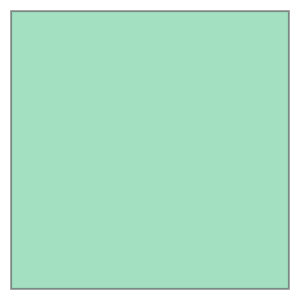

In [18]:
bbox = x_utm, y_utm, x_utm + 5_000, y_utm + 5000
box_geo = box(*bbox)
box_geo

## Automate

In [19]:
def get_one_new_bounding_box(water_arr, water_profile, box_size_m=5_000, window_size_m=2_500):
    
    p = water_profile.copy()
    p_new = update_profile_resolution(water_profile, window_size_m)
    p['dtype'] = 'float32'
    
    X_r, _ = reproject_arr_to_match_profile(water_arr, p, p_new)
    X_r = X_r[0, ...]
    
    row, col = np.unravel_index(X_r.argmax(), X_r.shape)
    
    x_utm, y_utm = xy(p_new['transform'], row, col, offset='ul')
    x_lr, y_lr = xy(water_profile['transform'], water_arr.shape[0], water_arr.shape[1], offset='ul')
    
    x_diff = x_lr - x_utm
    #y_utm occurs above y_lr
    y_diff = y_utm - y_lr
    if x_diff < box_size_m:
        x_utm = x_utm - (box_size_m - x_diff)
    if y_diff < box_size_m:
        y_utm = y_utm + (box_size_m - y_diff)
    
    bbox = [x_utm, 
            y_utm,  
            x_utm + box_size_m, 
            y_utm - box_size_m,
           ]
    box_geo = box(*bbox)
    
    return gpd.GeoDataFrame(geometry=[box_geo],
                            crs=p_new['crs'])

In [20]:
get_one_new_bounding_box(water_arrays[3], lulc_profiles[3])

,geometry
0,"POLYGON ((627058.005 7304987.977, 627058.005 7..."


In [21]:
from itertools import starmap

dfs_utm = list(starmap(get_one_new_bounding_box, zip(tqdm(water_arrays), lulc_profiles)))
dfs_utm[0]

100%|███████████████████████████████████| 131/131 [00:01<00:00, 67.20it/s]


,geometry
0,"POLYGON ((473710.000 7683506.277, 473710.000 7..."


In [22]:
dfs_new_chips_4326 = [df_utm.to_crs(df_chips.crs) for df_utm in dfs_utm]
df_new_chips = pd.concat(dfs_new_chips_4326, axis=0).reset_index(drop=True)
df_new_chips['site_name'] = df_chips['site_name'].values
df_new_chips.head()

,geometry,site_name
0,"POLYGON ((-159.66522 69.26009, -159.66385 69.2...",3_38
1,"POLYGON ((-113.00031 67.04574, -112.99662 67.0...",4_27
2,"POLYGON ((17.81813 65.99817, 17.81319 65.95337...",4_43
3,"POLYGON ((59.78286 65.84086, 59.77802 65.79605...",3_1
4,"POLYGON ((-96.51418 62.72101, -96.51794 62.676...",4_34


/var/folders/s6/fbsc26cd0ddffbp3_knts_9c0wcxj1/T/ipykernel_79260/1097778559.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_new_chips.buffer(1).plot()


<AxesSubplot:>

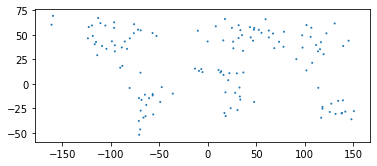

In [23]:
df_new_chips.buffer(1).plot()

<AxesSubplot:>

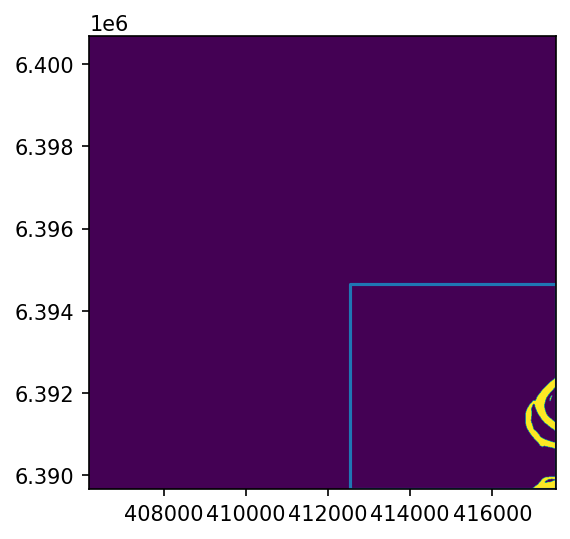

In [24]:
fig, ax = plt.subplots(dpi=150)

K = 13
show(water_arrays[K], 
     transform=lulc_profiles[K]['transform'], 
     ax=ax)
dfs_utm[K].boundary.plot(ax=ax)

<AxesSubplot:>

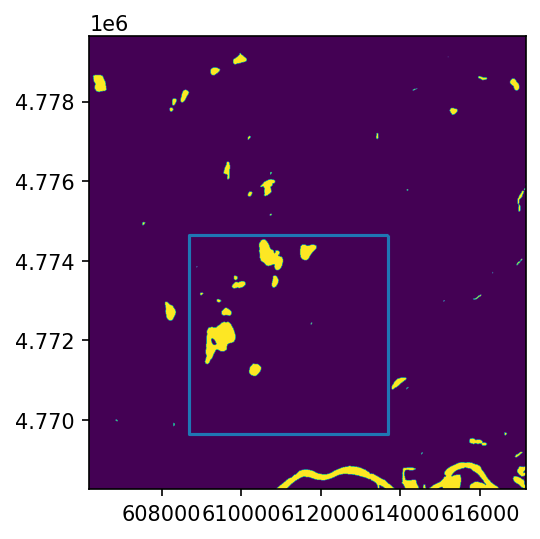

In [25]:
fig, ax = plt.subplots(dpi=150)

K = 44
show(water_arrays[K], 
     transform=lulc_profiles[K]['transform'], 
     ax=ax)
dfs_utm[K].boundary.plot(ax=ax)

<AxesSubplot:>

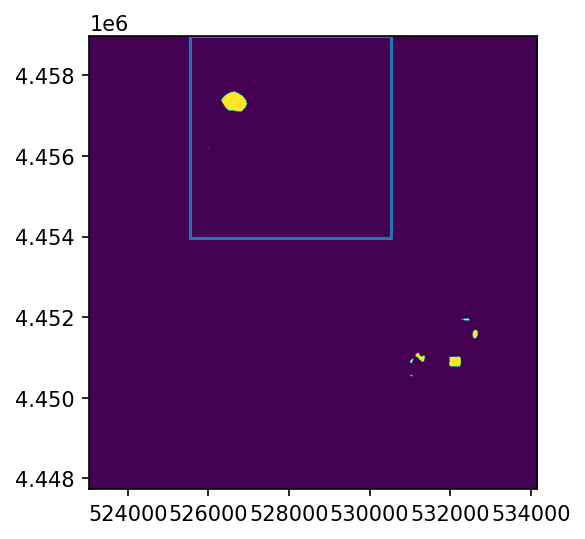

In [26]:
fig, ax = plt.subplots(dpi=150)

K = 48
show(water_arrays[K], 
     transform=lulc_profiles[K]['transform'], 
     ax=ax)
dfs_utm[K].boundary.plot(ax=ax)

# Get Statistics in 5 km area

In [27]:
utm_bounds = [list(df_utm.total_bounds) for df_utm in dfs_utm]
utm_bounds[:3]

[[468710.0, 7678506.276858786, 473710.0, 7683506.276858786],
 [407958.0054133987, 7432877.97658339, 412958.0054133987, 7437877.97658339],
 [622880.0, 7317580.0, 627880.0, 7322580.0]]

In [28]:
def get_subset_slice(arr, profile, bounds):
    (start_y, start_x), (stop_y, stop_x) = get_indices_from_extent(profile['transform'],
                                                                   bounds,
                                                                   shape=arr.shape
                                                                  )
    
    sx = np.s_[start_x: stop_x]
    sy = np.s_[start_y: stop_y]
    return sy, sx

In [29]:
slices = list(starmap(get_subset_slice, zip(water_arrays, lulc_profiles, utm_bounds)))
slices[30]

(slice(0, 500, None), slice(250, 750, None))

In [30]:
chip_records = df_chips.to_dict('records')
chip_records[0]

{'site_name': '3_38',
 'water_content': 3.0,
 'geometry': <shapely.geometry.polygon.Polygon at 0x1d35ef880>}

In [31]:
def get_pixel_stats(k):
    sy, sx = slices[k]
    return {'site_name': chip_records[k]['site_name'],
            'water_pixels_orig': water_arrays[k].sum(),
            'inundated_vegetation_orig': wetland_arrays[k].sum(),
            'total_pixels_orig': water_arrays[k].size,
            'water_pixels_crop': water_arrays[k][sy, sx].sum(),
            'inundated_vegetation_crop': wetland_arrays[k][sy, sx].sum(),
            'total_pixels_crop': water_arrays[k][sy, sx].size,
           }

In [32]:
pixel_stats = list(map(get_pixel_stats, range(len(water_arrays))))
pixel_stats[0]

{'site_name': '3_38',
 'water_pixels_orig': 0.0,
 'inundated_vegetation_orig': 0.0,
 'total_pixels_orig': 1252157,
 'water_pixels_crop': 0.0,
 'inundated_vegetation_crop': 0.0,
 'total_pixels_crop': 250000}

In [33]:
df_stats = pd.DataFrame(pixel_stats)
df_stats['percent_water_orig'] = df_stats['water_pixels_orig'] / df_stats['total_pixels_orig'] * 100
df_stats['percent_inundated_vegetation_orig'] = df_stats['inundated_vegetation_orig'] / df_stats['total_pixels_orig'] * 100

df_stats['percent_water_crop'] = df_stats['water_pixels_crop'] / df_stats['total_pixels_crop'] * 100
df_stats['percent_inundated_vegetation_crop'] = df_stats['inundated_vegetation_crop'] / df_stats['total_pixels_crop'] * 100

df_stats['percent_total_water_orig'] = df_stats['percent_water_orig'] + df_stats['percent_inundated_vegetation_orig']

df_stats['percent_total_water_crop'] = df_stats['percent_water_crop'] + df_stats['percent_inundated_vegetation_crop']

df_stats.head()

,site_name,water_pixels_orig,inundated_vegetation_orig,total_pixels_orig,water_pixels_crop,inundated_vegetation_crop,total_pixels_crop,percent_water_orig,percent_inundated_vegetation_orig,percent_water_crop,percent_inundated_vegetation_crop,percent_total_water_orig,percent_total_water_crop
0,3_38,0.0,0.0,1252157,0.0,0.0,250000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000
1,4_27,286582.0,8919.0,1251485,78861.0,3701.0,250000,22.899356,0.712673,31.5444,1.4804,23.612029,33.0248
2,4_43,556111.0,41908.0,1244440,192790.0,2307.0,250000,44.687651,3.367619,77.1160,0.9228,48.055270,78.0388
3,3_1,17647.0,246974.0,1244553,7271.0,41560.0,250000,1.417939,19.844394,2.9084,16.6240,21.262333,19.5324
4,4_34,87513.0,141601.0,1247523,25947.0,69078.0,250000,7.014941,11.350572,10.3788,27.6312,18.365513,38.0100


In [34]:
df_chips_stats = pd.merge(df_new_chips, df_stats, on='site_name')
df_chips_stats.head()

,geometry,site_name,water_pixels_orig,inundated_vegetation_orig,total_pixels_orig,water_pixels_crop,inundated_vegetation_crop,total_pixels_crop,percent_water_orig,percent_inundated_vegetation_orig,percent_water_crop,percent_inundated_vegetation_crop,percent_total_water_orig,percent_total_water_crop
0,"POLYGON ((-159.66522 69.26009, -159.66385 69.2...",3_38,0.0,0.0,1252157,0.0,0.0,250000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000
1,"POLYGON ((-113.00031 67.04574, -112.99662 67.0...",4_27,286582.0,8919.0,1251485,78861.0,3701.0,250000,22.899356,0.712673,31.5444,1.4804,23.612029,33.0248
2,"POLYGON ((17.81813 65.99817, 17.81319 65.95337...",4_43,556111.0,41908.0,1244440,192790.0,2307.0,250000,44.687651,3.367619,77.1160,0.9228,48.055270,78.0388
3,"POLYGON ((59.78286 65.84086, 59.77802 65.79605...",3_1,17647.0,246974.0,1244553,7271.0,41560.0,250000,1.417939,19.844394,2.9084,16.6240,21.262333,19.5324
4,"POLYGON ((-96.51418 62.72101, -96.51794 62.676...",4_34,87513.0,141601.0,1247523,25947.0,69078.0,250000,7.014941,11.350572,10.3788,27.6312,18.365513,38.0100


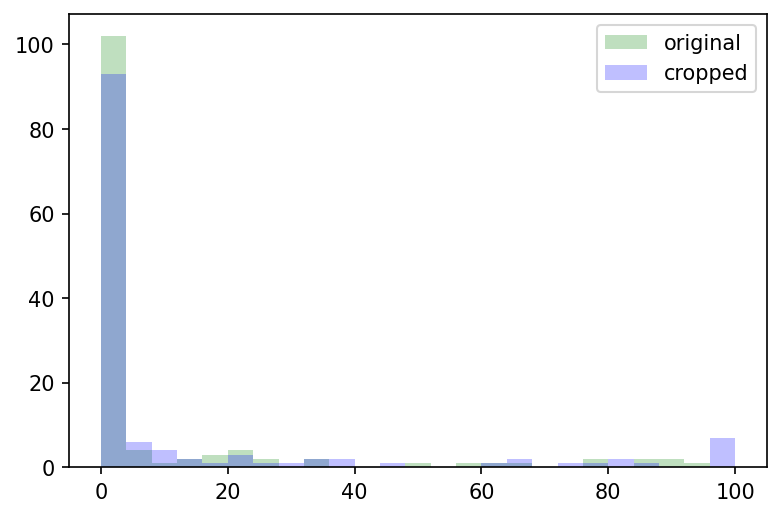

In [35]:
plt.figure(dpi=150)
plt.hist(df_chips_stats.percent_total_water_orig.values, 
         alpha=.25, 
         color='green', 
         range=(0, 100), bins=25,
         label='original')

plt.hist(df_chips_stats.percent_total_water_crop.values, 
         alpha=.25, 
         color='blue', 
         range=(0, 100), bins=25,
        label='cropped')
plt.legend()

In [36]:
df_chips_stats.to_file('new_chips.geojson', driver='GeoJSON')

In [ ]:
df_chips_stats.to_csv('')